1. Import the Libraries And Dataset

<!-- python3 -m pip install -U seaborn -->

<!-- pip install tk -->
<!-- python3 -m pip install -U scikit-learn -->


1. Importing the Libraries and Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pickle as pk

In [3]:
data = pd.read_csv('heart_disease.csv')

2. Data Description

2.1 Displaying Top 5 Rows of the Dataset

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


2.2 Displaying the columns in the Dataset

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The following features(columns) are described in the dataset for Heart Disease Analysis and Prediction

1. age: age in years
2. sex:
        0 = Female
        1 = Male
3. cp: Chest pain types
        0 = Typical angina
        1 = Atypical angina
        2 = Non-anginal pain
        3 = Asymptomatic
4. trestbps: Resting blood pressure (mmHg)
        High blood pressure = 140 mmHg or above
5. chol: Serum cholestoral (mg/dL)
        .Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
        .Calculation = HDL + LDL + 0.2 * triglycerides
        .Higher than 200 mg/dL is concerned
6. fbs: Fasting blood sugar (> 120 mg/dL)
        0 = False
        1 = True
        Higher than 126 mg/dL points to diabetes
7. restecg: Resting electrocardiographic results
        0 = Normal
        1 = Abnormal ST-T wave
        2 = Showing probable or definite left ventricular hypertrophy
8. thalach: Maximum heart rate achieved (bpm)
9. exang: Exercise induced angina
        0 = False
        1 = True
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
        0 = Upsloping
        1 = Horizontal
        2 = Downsloping
12. ca: Number of major vessels (0-3) colored by fluoroscopy
        .The colored blood vessels are passing through
        .There is a clot if the blood vessel is not colored
13. thal: Thallium scintigraphy
        1 = Normal
        2 = Fixed defect
        3 = Reversable defect
14. target: Heart Disease
        0 = No Heart Disease
        1 = Heart Disease

2.3 Checking Last 5 Rows of Dataset

In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


2.4 Finding Shape of the Dataset (Number of Rows and Columns)

In [7]:
data.shape

(1025, 14)

In [8]:
print("Number of Rows = ", data.shape[0])
print("Number of Columns = ", data.shape[1])


Number of Rows =  1025
Number of Columns =  14


2.5 Getting Information about the Dataset (Total number of rows and columns, Datatype, Count of Non-Null Values, Memory Usage)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


3. Data Cleaning

3.1 Checking for Null Values

In [10]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

3.2 Checking for Duplicate Values and Dropping them

In [12]:
data_duplicates=data.duplicated().any()
print(data_duplicates)

True


In [13]:
data=data.drop_duplicates()

In [14]:
data_duplicates=data.duplicated().any()
print(data_duplicates)
data.shape

False


(302, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


4. Getting Overall Statistics about the Dataset

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

5. Data Visualization

5.1 Target Variable

In [17]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

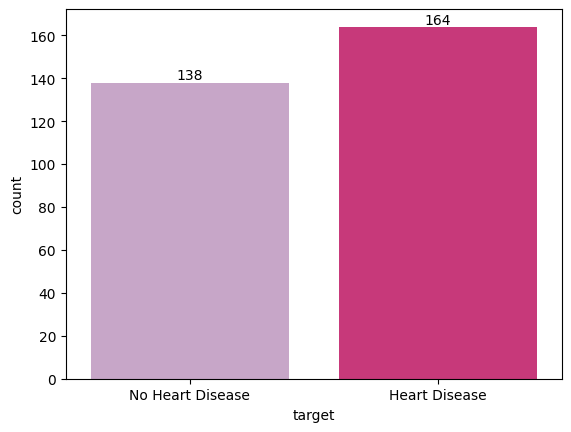

<Figure size 640x480 with 0 Axes>

In [18]:
ax=sns.countplot(data=data, x='target', palette='PuRd')
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

plt.savefig("count.svg")

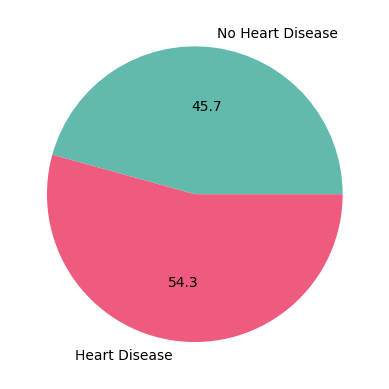

In [19]:
data.groupby('target').size().plot(kind = 'pie', labels=['No Heart Disease','Heart Disease'],autopct = '%.1f',colors=['#62BAAC','#EE5B7F'])
# plt.legend(labels=['No Heart Disease','Heart Disease'])
plt.show()

5.2 Feature Variable: Sex
0-Female, 1-Male

In [20]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

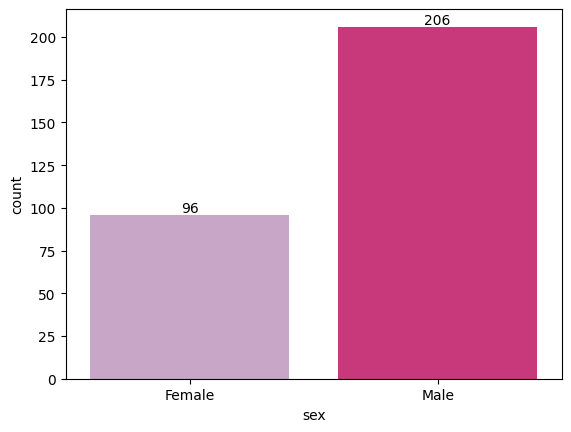

<Figure size 640x480 with 0 Axes>

In [21]:
ax=sns.countplot(data=data, x='sex', palette='PuRd')
plt.xticks([0,1],['Female','Male'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

plt.savefig("count.svg")

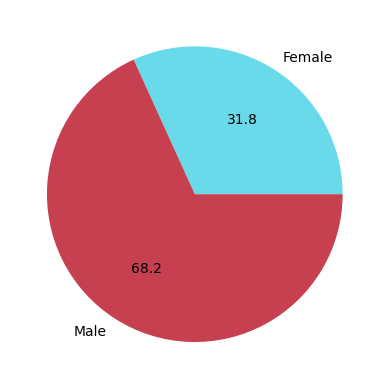

In [22]:
data.groupby('sex').size().plot(kind = 'pie', autopct = '%.1f', labels=['Female','Male'], colors=['#69DAE9','#C74050'])
plt.show()

# plt.pie(data.groupby('sex').size(),autopct = '%.1f', labels=['Benign','Malignant'], colors=['#69DAE9','#C74050'])
# plt.show()

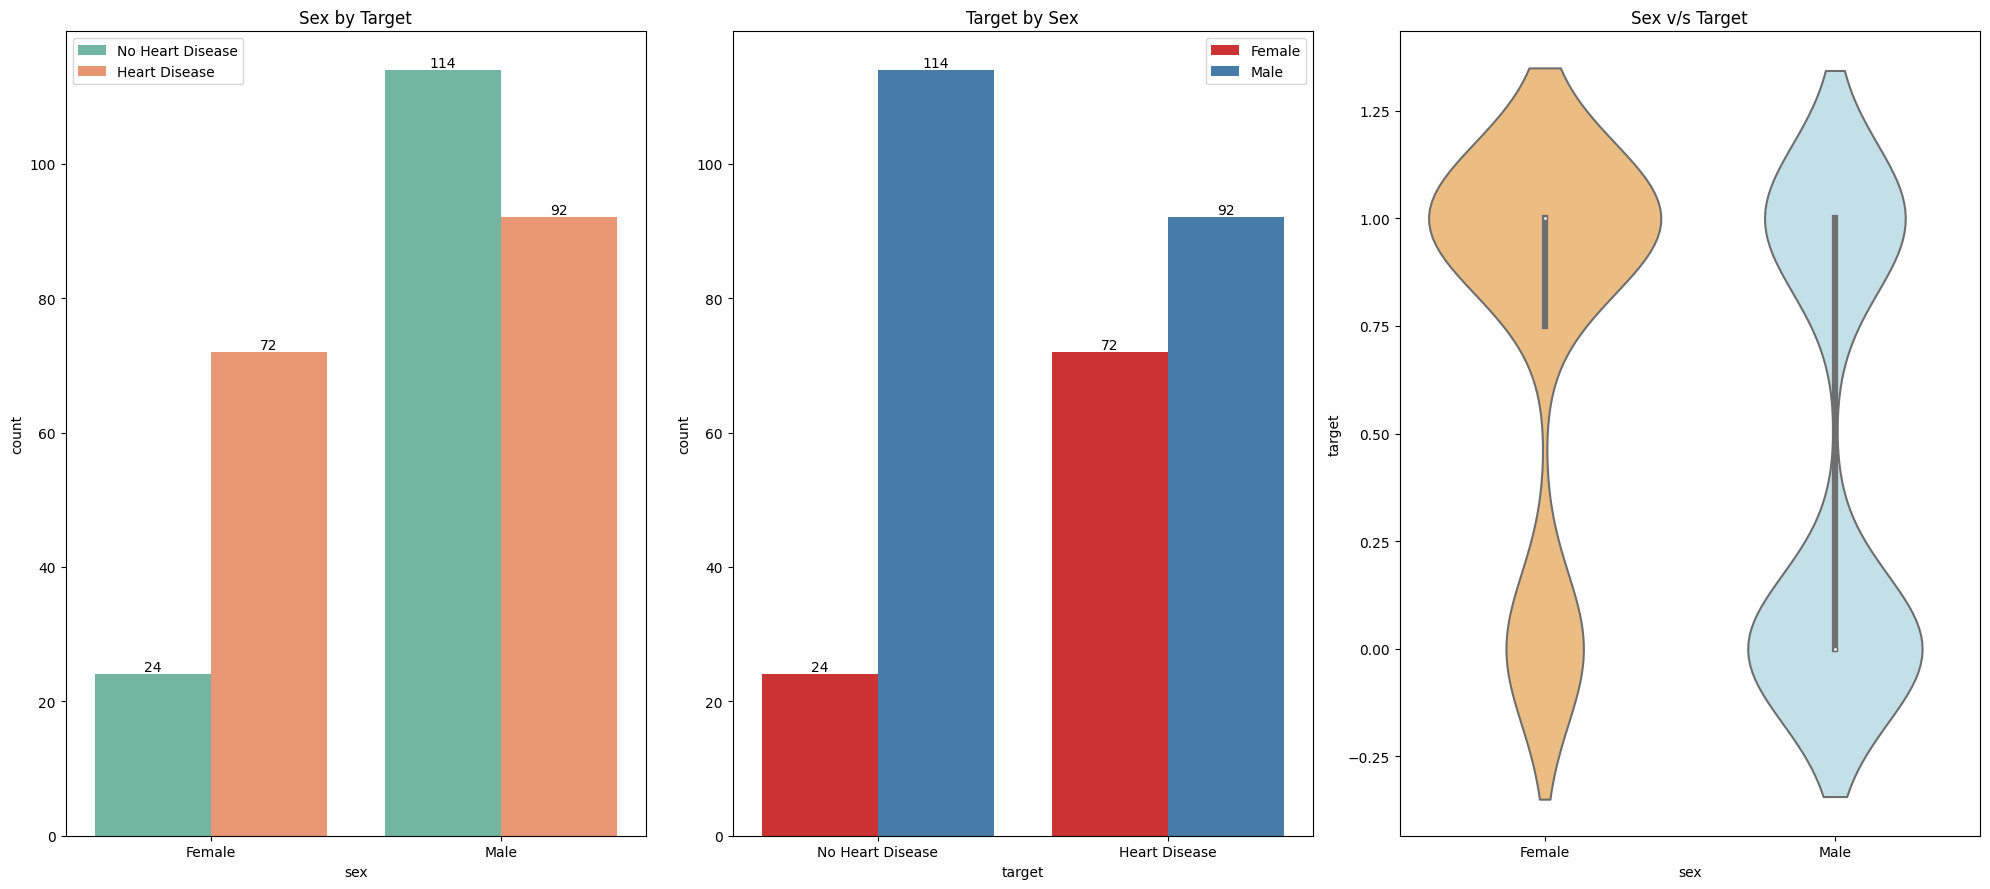

The percentage of Malignant for Sex:
Female: 43.90%
Male: 56.10%


In [23]:
fig = plt.figure(figsize=(20, 9))

plt.subplot(1, 3, 1)
ax=sns.countplot(data=data, x='sex', hue='target', palette='Set2')
plt.title('Sex by Target')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No Heart Disease','Heart Disease'])
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1, 3, 2)
ax=sns.countplot(data=data, x='target', hue='sex', palette='Set1')
plt.title('Target by Sex')
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.legend(labels=['Female','Male'])
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1, 3, 3)
plt.title('Sex v/s Target')
sns.violinplot(y = data['target'], x = data['sex'], palette='RdYlBu')
plt.xticks([1,0],['Male','Female'])

plt.tight_layout()
plt.show()

# female_malignant vs. Malignant
female_malignant = data[data['sex']==0]['target'].sum()/data[data['target']==1]['target'].count()
# male_malignant vs. Malignant
male_malignant = data[data['sex']==1]['target'].sum()/data[data['target']==1]['target'].count()

print('The percentage of Malignant for Sex:')
print(f'Female: {female_malignant:.2%}')
print(f'Male: {male_malignant:.2%}')

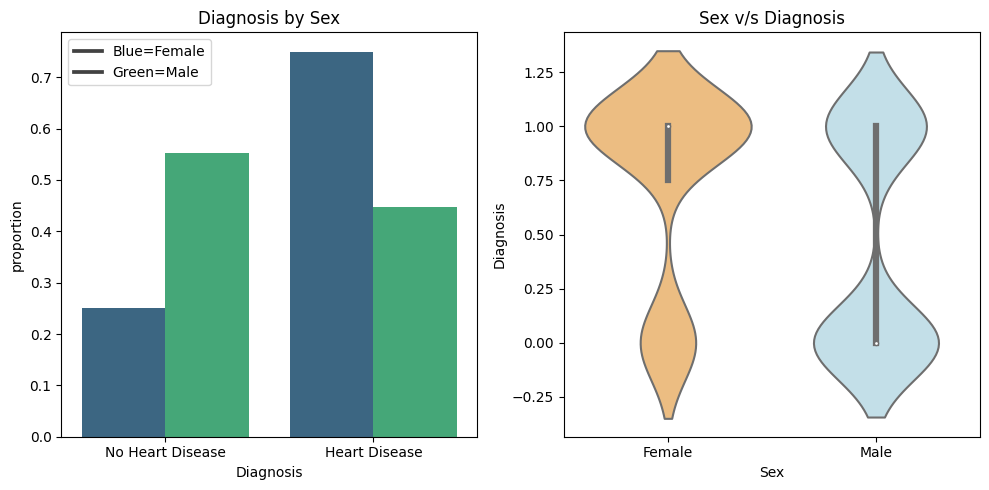

The percentage of Malignant for Sex:
Female: 43.90%
Male: 56.10%


In [24]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
data['target'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='target', y='proportion', hue='sex', palette='viridis')
plt.legend(labels=['Blue=Female','Green=Male'])
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.xlabel("Diagnosis")
plt.title('Diagnosis by Sex', fontsize=12)

plt.subplot(1, 2, 2)
plt.title('Sex v/s Diagnosis',fontsize=12)
sns.violinplot(y = data['target'], x = data['sex'], palette='RdYlBu')
plt.xlabel("Sex")
plt.ylabel("Diagnosis")
plt.xticks([1,0],['Male','Female'])

plt.tight_layout()
plt.show()

# female_malignant vs. Malignant
female_malignant = data[data['sex']==0]['target'].sum()/data[data['target']==1]['target'].count()
# male_malignant vs. Malignant
male_malignant = data[data['sex']==1]['target'].sum()/data[data['target']==1]['target'].count()

print('The percentage of Malignant for Sex:')
print(f'Female: {female_malignant:.2%}')
print(f'Male: {male_malignant:.2%}')

From the above data, females are more prone to heart diseases than male....

5.3 Feature Variable: Age

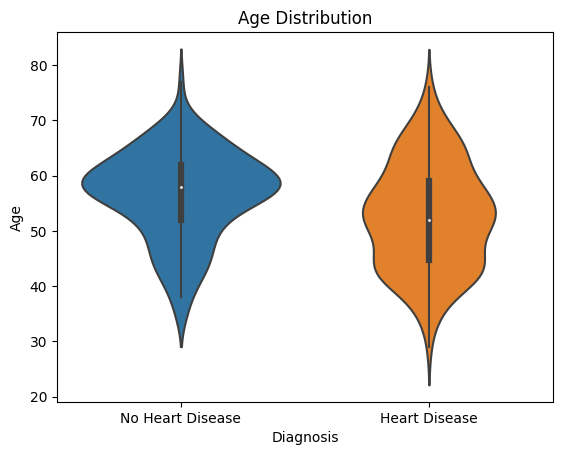

In [25]:
sns.violinplot(y = data['age'], x = data['target'])
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.title('Age Distribution',fontsize=12)
plt.show()

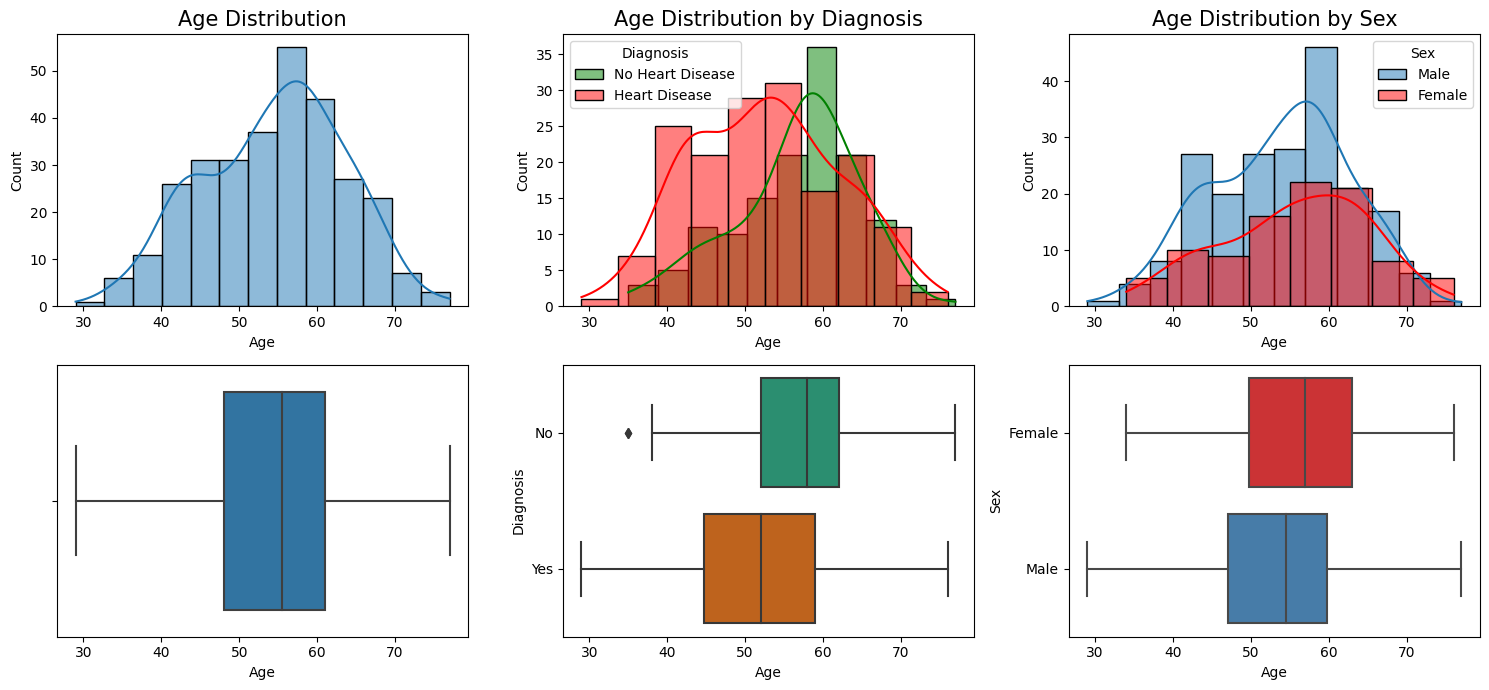

In [26]:
fig = plt.figure(figsize=(15, 7))

    # Age distribution
plt.subplot(2, 3, 1)
sns.histplot(data['age'], kde = True) 
plt.xlabel("Age")
plt.title('Age Distribution', fontsize=15)

plt.subplot(2, 3, 4)
sns.boxplot(x=data['age'], orient='h')
plt.xlabel("Age")
 
 
 # Age distribution for Condition
plt.subplot(2, 3, 2)
benign = data[data['target']==0]['age']
malignant = data[data['target']==1]['age']
sns.histplot(benign,kde = True, color='Green', label='No Heart Disease')
sns.histplot(malignant,kde = True, color='Red', label='Heart Disease')
plt.title('Age Distribution by Diagnosis', fontsize=15)
plt.xlabel("Age")
plt.legend(title='Diagnosis',fontsize=10)
    
plt.subplot(2, 3, 5)
sns.boxplot(x=data['age'], y=data['target'], orient='h', palette='Dark2')   
plt.ylabel('Diagnosis') 
plt.xlabel("Age")
plt.yticks([0,1],['No','Yes'])

# Age distribution for sex
plt.subplot(2, 3, 3)
female = data[data['sex']==0]['age']
male = data[data['sex']==1]['age']
sns.histplot(male,kde = True, label='Male')
sns.histplot(female,kde = True, color='Red', label='Female')
plt.title('Age Distribution by Sex', fontsize=15)
plt.xlabel("Age")
plt.legend(title='Sex',fontsize=10)

plt.subplot(2, 3, 6)
sns.boxplot(x=data['age'], y=data['sex'], orient='h', palette='Set1')
plt.ylabel('Sex') 
plt.xlabel("Age")
plt.yticks([0,1],['Female','Male'])
    
    
plt.tight_layout()
plt.show()

5.4 Feature Variable: Chest Pain Type

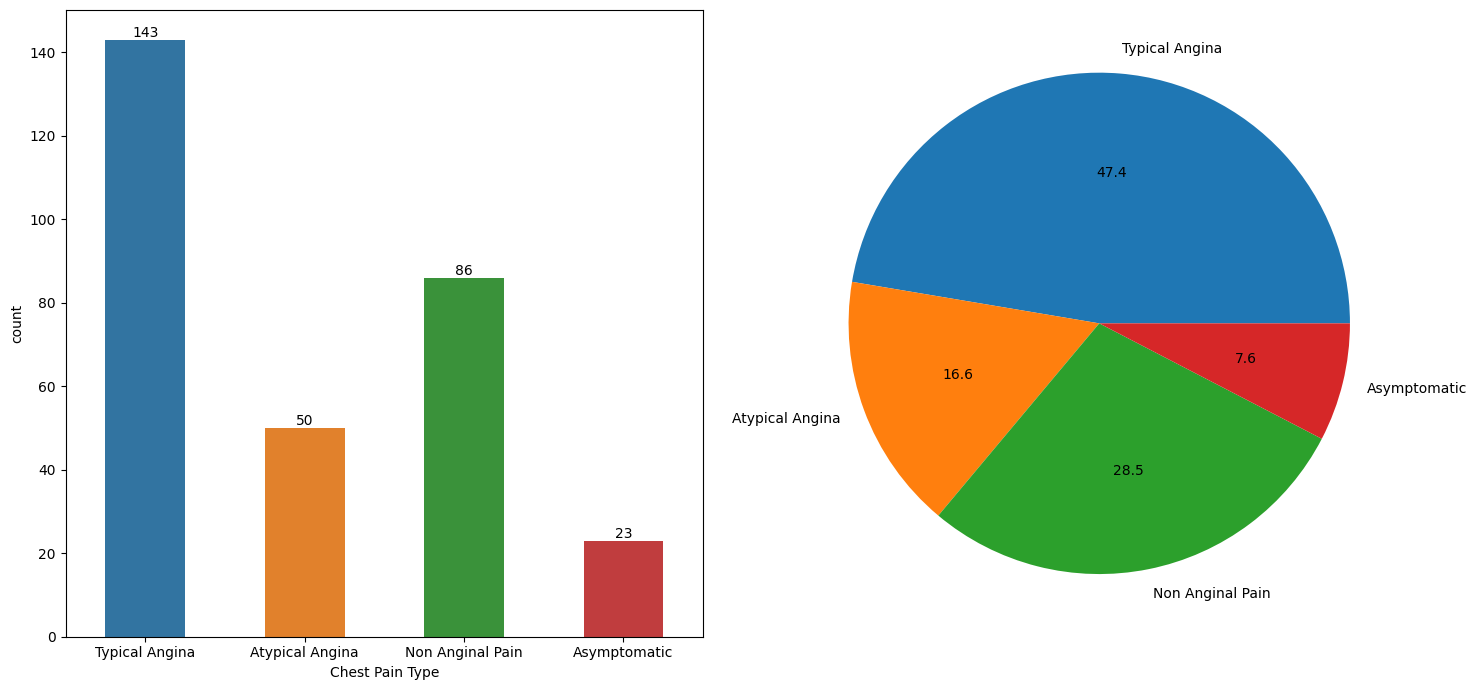

In [27]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
ax=sns.countplot(data=data, x='cp', width=0.5)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Chest Pain Type')


plt.subplot(1,2,2)
data.groupby('cp').size().plot(kind = 'pie', autopct = '%.1f',labels=['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])

plt.tight_layout()
plt.show()

# total=data['cp'].count()

# ta=((data['cp']==0).sum()/total)*100
# aa=((data['cp']==1).sum()/total)*100
# na=((data['cp']==2).sum()/total)*100
# a=((data['cp']==3).sum()/total)*100

# print(f'Typical Angina: {ta:.2f}%')
# print(f'Atypical Angina: {aa:.2f}%')
# print(f'Non Anginal: {na:.2f}%')
# print(f'Asymptomatic: {a:.2f}%')

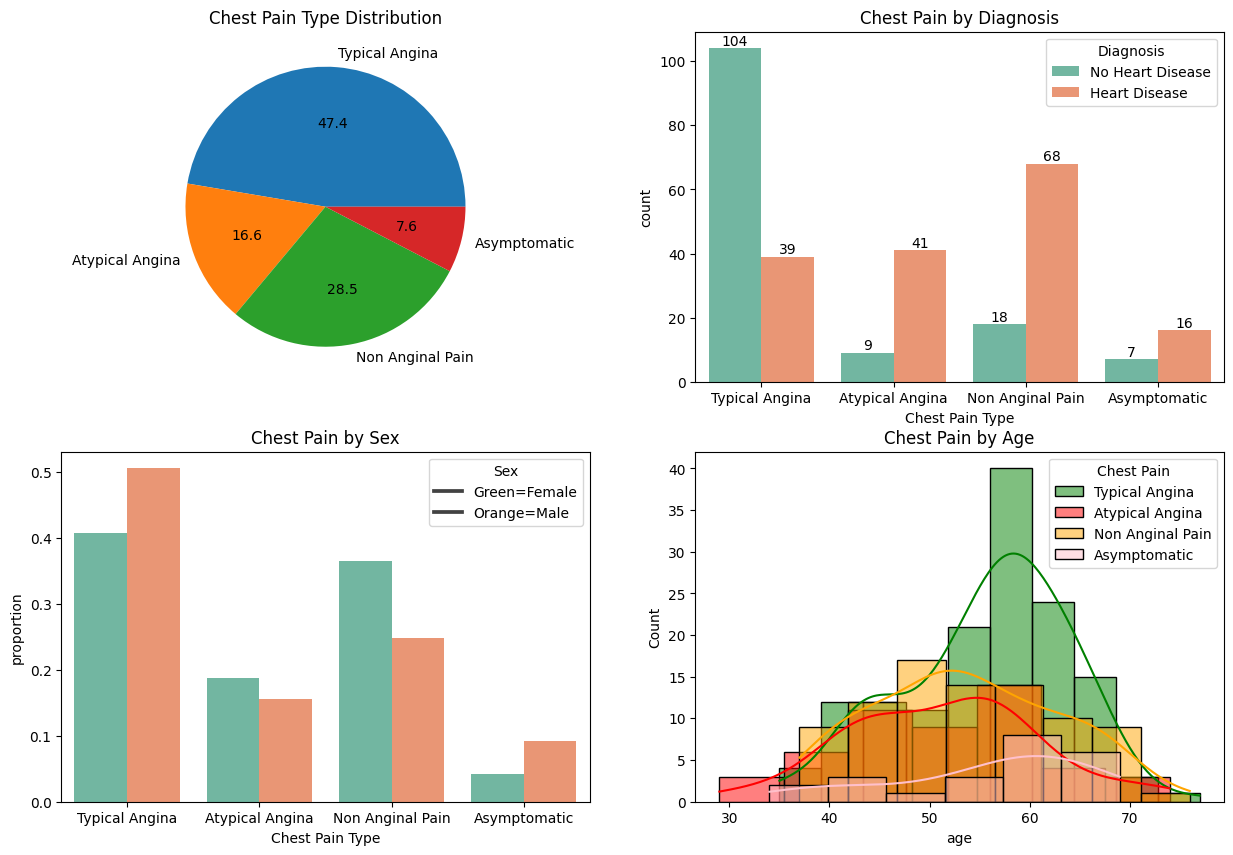

<Figure size 640x480 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
data.groupby('cp').size().plot(kind = 'pie', autopct = '%.1f',labels=['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.title('Chest Pain Type Distribution', fontsize=12)

plt.subplot(2,2,2)
ax=sns.countplot(data=data, x='cp',hue='target', palette='Set2')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.legend(title='Diagnosis', labels=['No Heart Disease','Heart Disease'])
plt.xlabel('Chest Pain Type')
plt.title('Chest Pain by Diagnosis', fontsize=12)

plt.subplot(2,2,3)
data['cp'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='cp', y='proportion', hue='sex', palette='Set2')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.legend(title='Sex',labels=['Green=Female','Orange=Male'])
plt.xlabel('Chest Pain Type')
plt.title('Chest Pain by Sex', fontsize=12)


# cp by Age
plt.subplot(2,2,4)
ta = data[data['cp']==0]['age']
aa = data[data['cp']==1]['age']
na = data[data['cp']==2]['age']
a = data[data['cp']==3]['age']
sns.histplot(ta,kde = True, color='Green', label='Typical Angina')
sns.histplot(aa,kde = True, color='Red', label='Atypical Angina')
sns.histplot(na,kde = True, color='Orange', label='Non Anginal Pain')
sns.histplot(a,kde = True, color='Pink', label='Asymptomatic')
plt.title('Chest Pain by Age', fontsize=12)
plt.legend(title='Chest Pain', fontsize=10)
plt.show()

plt.tight_layout()
plt.show()

Typical Angina pain has more people with benign heart disease while all other type of pains have more Malignant heart disease with Non Anginal pain having the greatest number.

5.5 Feature Variable: Resting Blood Pressure

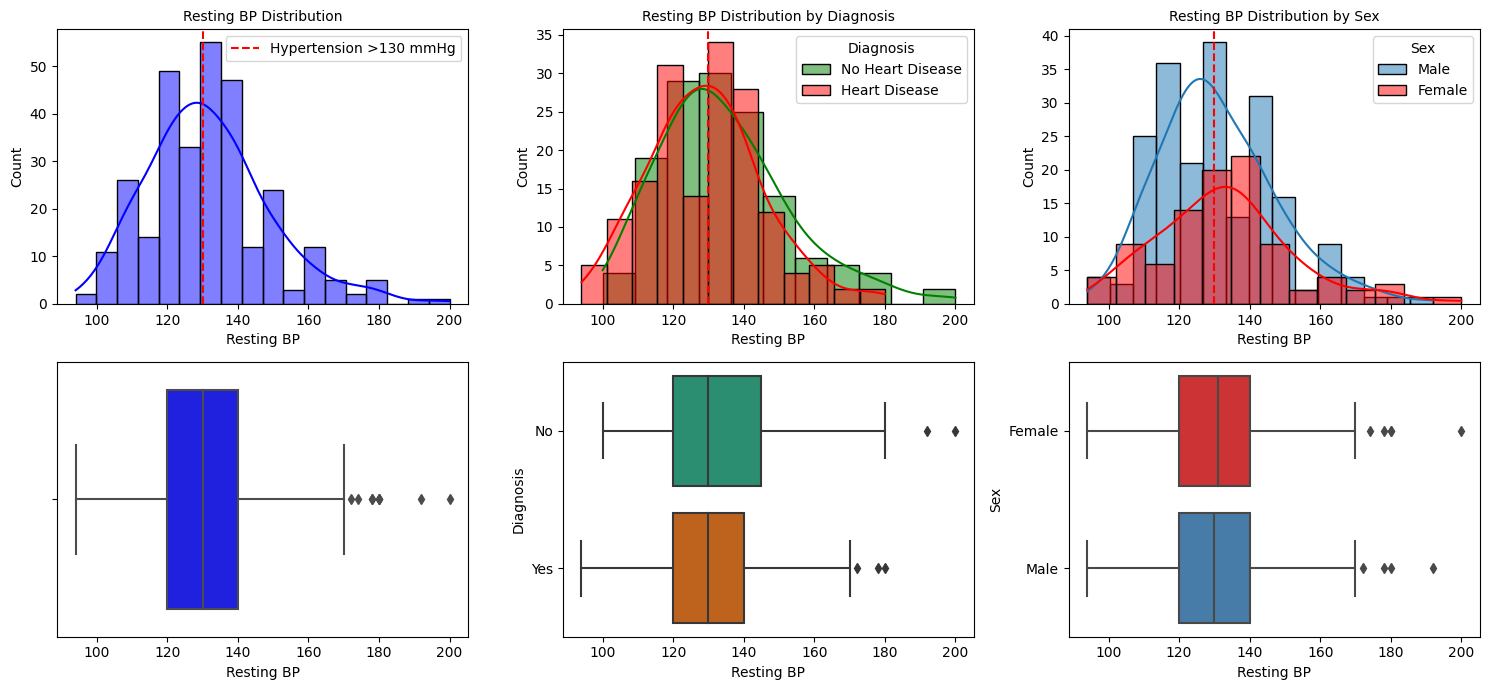

In [29]:
fig = plt.figure(figsize=(15, 7))

# tresbps distribution
plt.subplot(2, 3, 1)
sns.histplot(data['trestbps'], kde = True, color='blue') 
plt.title('Resting BP Distribution', fontsize=10)
plt.xlabel('Resting BP') 
plt.axvline(x=130, color='r', linestyle='--', label='Hypertension >130 mmHg')
plt.legend()

plt.subplot(2, 3, 4)
sns.boxplot(x=data['trestbps'], orient='h', color='blue')
plt.xlabel('Resting BP') 
    
# trestbps distribution for Condition
plt.subplot(2, 3, 2)
benign = data[data['target']==0]['trestbps']
malignant = data[data['target']==1]['trestbps']
sns.histplot(benign,kde = True, color='Green', label='No Heart Disease')
sns.histplot(malignant,kde = True, color='Red', label='Heart Disease')
plt.title('Resting BP Distribution by Diagnosis', fontsize=10)
plt.legend(title='Diagnosis', fontsize=10)
plt.axvline(x=130, color='r', linestyle='--')
plt.xlabel('Resting BP')  
  
plt.subplot(2, 3, 5)
sns.boxplot(x=data['trestbps'], y=data['target'], orient='h', palette='Dark2')
plt.xlabel('Resting BP') 
plt.ylabel('Diagnosis') 
plt.yticks([0,1],['No','Yes'])

# Trestbps distribution for sex
plt.subplot(2, 3, 3)
female = data[data['sex']==0]['trestbps']
male = data[data['sex']==1]['trestbps']
sns.histplot(male, kde = True, label='Male')
sns.histplot(female, kde = True, color='Red', label='Female')
plt.title('Resting BP Distribution by Sex', fontsize=10)
plt.legend(title='Sex', fontsize=10)
plt.xlabel('Resting BP') 
plt.axvline(x=130, color='r', linestyle='--')

plt.subplot(2, 3, 6)
sns.boxplot(x=data['trestbps'], y=data['sex'], orient='h', palette='Set1')
plt.xlabel('Resting BP')  
plt.ylabel('Sex')  
plt.yticks([0,1],['Female','Male'])
    
    
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

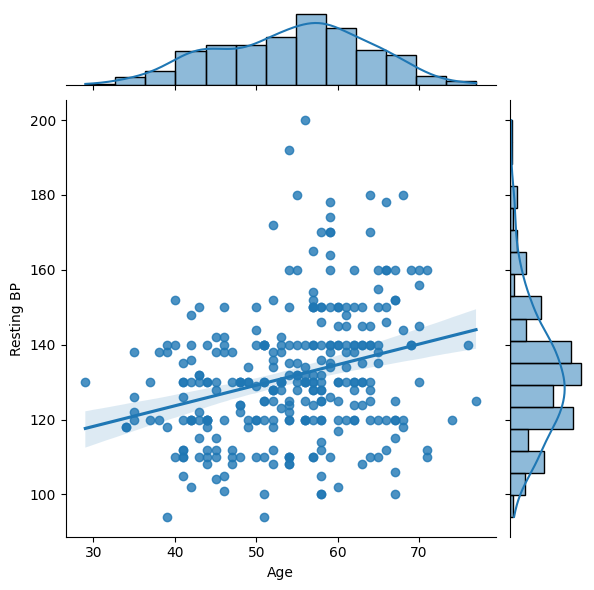

In [30]:
fig = plt.figure(figsize=(5, 5))
sns.jointplot(x = 'age' , y = 'trestbps', data = data, kind = 'reg')
plt.ylabel('Resting BP')
plt.xlabel('Age')
plt.show()

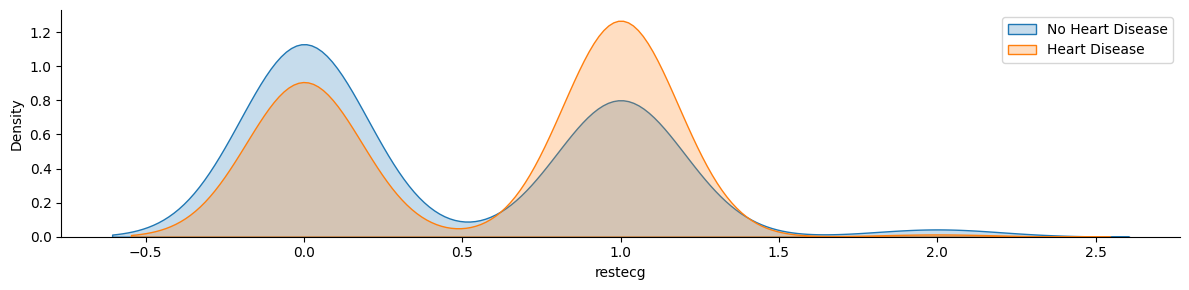

In [31]:
g=sns.FacetGrid(data,hue='target',aspect=4)
g.map(sns.kdeplot,'restecg', fill=True)
plt.legend(labels=['No Heart Disease','Heart Disease'])

5.6 Feature Variable: Serum Cholestrol

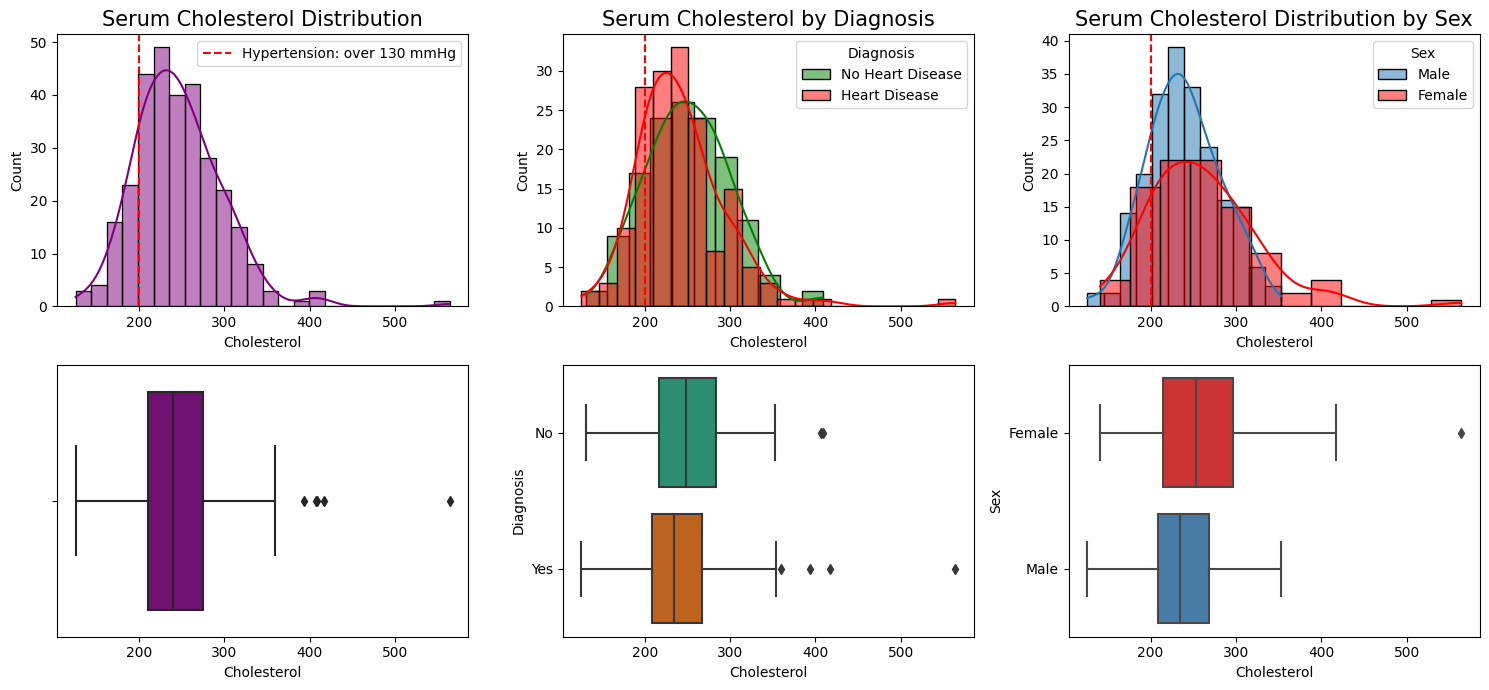

In [32]:
fig = plt.figure(figsize=(15, 7))

# cholestrol distribution
plt.subplot(2, 3, 1)
sns.histplot(data['chol'], kde = True, color='purple') 
plt.title('Serum Cholesterol Distribution', fontsize=15)
plt.xlabel('Cholesterol') 
plt.axvline(x=200, color='r', linestyle='--', label='Hypertension: over 200 mg/dL')
plt.legend()

plt.subplot(2, 3, 4)
sns.boxplot(x=data['chol'], orient='h', color='purple')
plt.xlabel('Cholesterol') 
    
    # cholestrol distribution for Condition
plt.subplot(2, 3, 2)
benign = data[data['target']==0]['chol']
malignant = data[data['target']==1]['chol']
sns.histplot(benign,kde = True, color='Green', label='No Heart Disease')
sns.histplot(malignant,kde = True, color='Red', label='Heart Disease')
plt.title('Serum Cholesterol by Diagnosis', fontsize=15)
plt.legend(title='Diagnosis', fontsize=10)
plt.xlabel('Cholesterol') 
plt.axvline(x=200, color='r', linestyle='--')
    
plt.subplot(2, 3, 5)
sns.boxplot(x=data['chol'], y=data['target'], orient='h', palette='Dark2')
plt.xlabel('Cholesterol') 
plt.ylabel('Diagnosis') 
plt.yticks([0,1],['No','Yes'])

    # cholestrol distribution for sex
plt.subplot(2, 3, 3)
female = data[data['sex']==0]['chol']
male = data[data['sex']==1]['chol']
sns.histplot(male, kde = True, label='Male')
sns.histplot(female, kde = True, color='Red', label='Female')
plt.title('Serum Cholesterol Distribution by Sex', fontsize=15)
plt.legend(title='Sex', fontsize=10)
plt.xlabel('Cholesterol') 
plt.axvline(x=200, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

plt.subplot(2, 3, 6)
sns.boxplot(x=data['chol'], y=data['sex'], orient='h', palette='Set1')
plt.xlabel('Cholesterol') 
plt.ylabel('Sex')
plt.yticks([0,1],['Female','Male'])
    
    
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

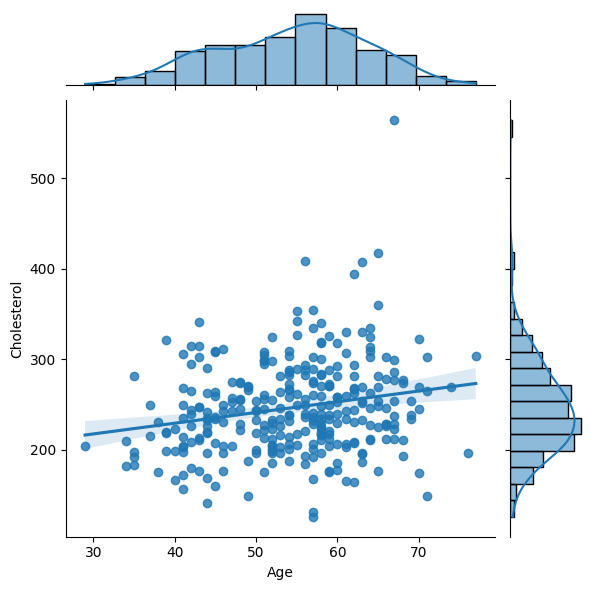

In [33]:
fig = plt.figure(figsize=(5, 5))
sns.jointplot(x = 'age' , y = 'chol', data = data, kind = 'reg')
plt.ylabel('Cholesterol') 
plt.xlabel('Age')
plt.show()

5.7 Feature Variable: Fasting Blood Sugar
0-Fasting blood sugar under 120 mg/dl
1-Fasting blood sugar over 120 mg/dl

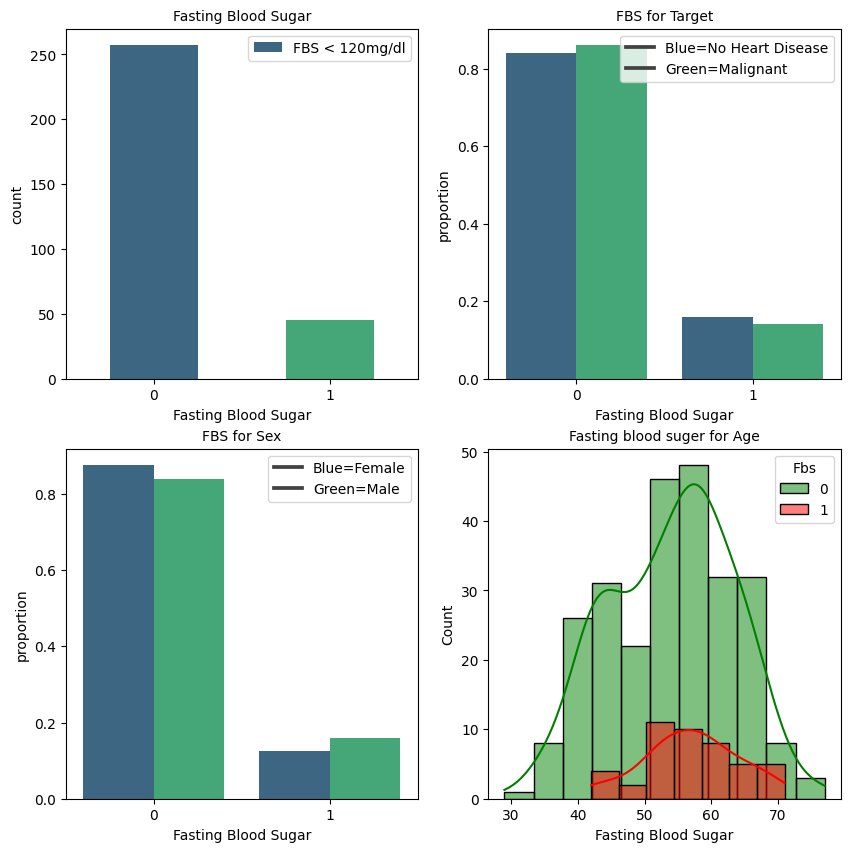

<Figure size 640x480 with 0 Axes>

In [34]:
fig = plt.figure(figsize=(10, 10))

# Fasting blood sugar > 120 mg/dl
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='fbs',palette='viridis', width=0.5)
plt.legend(labels=['FBS < 120mg/dl','FBS > 120mg/dl'])
plt.xlabel('Fasting Blood Sugar')
plt.title('Fasting Blood Sugar', fontsize=10)

# Fasting blood sugar by Target
plt.subplot(2, 2, 2)
data['fbs'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='fbs', y='proportion', hue='target', palette='viridis')
plt.legend(labels=['Blue=No Heart Disease','Green=Malignant'])
plt.xlabel('Fasting Blood Sugar')
plt.title('FBS for Target', fontsize=10)


# Fasting blood sugar by Sex
plt.subplot(2, 2, 3)
data['fbs'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='fbs', y='proportion', hue='sex', palette='viridis')
plt.legend(labels=['Blue=Female','Green=Male'])
plt.xlabel('Fasting Blood Sugar')
plt.title('FBS for Sex', fontsize=10)

# Fasting blood sugar by Age
plt.subplot(2, 2, 4)
nondiabetic = data[data['fbs']==0]['age']
diabetic = data[data['fbs']==1]['age']
sns.histplot(nondiabetic,kde = True, color='Green', label='0')
sns.histplot(diabetic,kde = True, color='Red', label='1')
plt.title('Fasting blood suger for Age', fontsize=10)
plt.xlabel('Fasting Blood Sugar')
plt.legend(title='Fbs', fontsize=10)
plt.show()

plt.tight_layout()
plt.show()

5.8 Feature Variable: Resting electrocardiographic results
0 = Normal
1 = Abnormal ST-T wave
2 = Showing probable or definite left ventricular hypertrophy

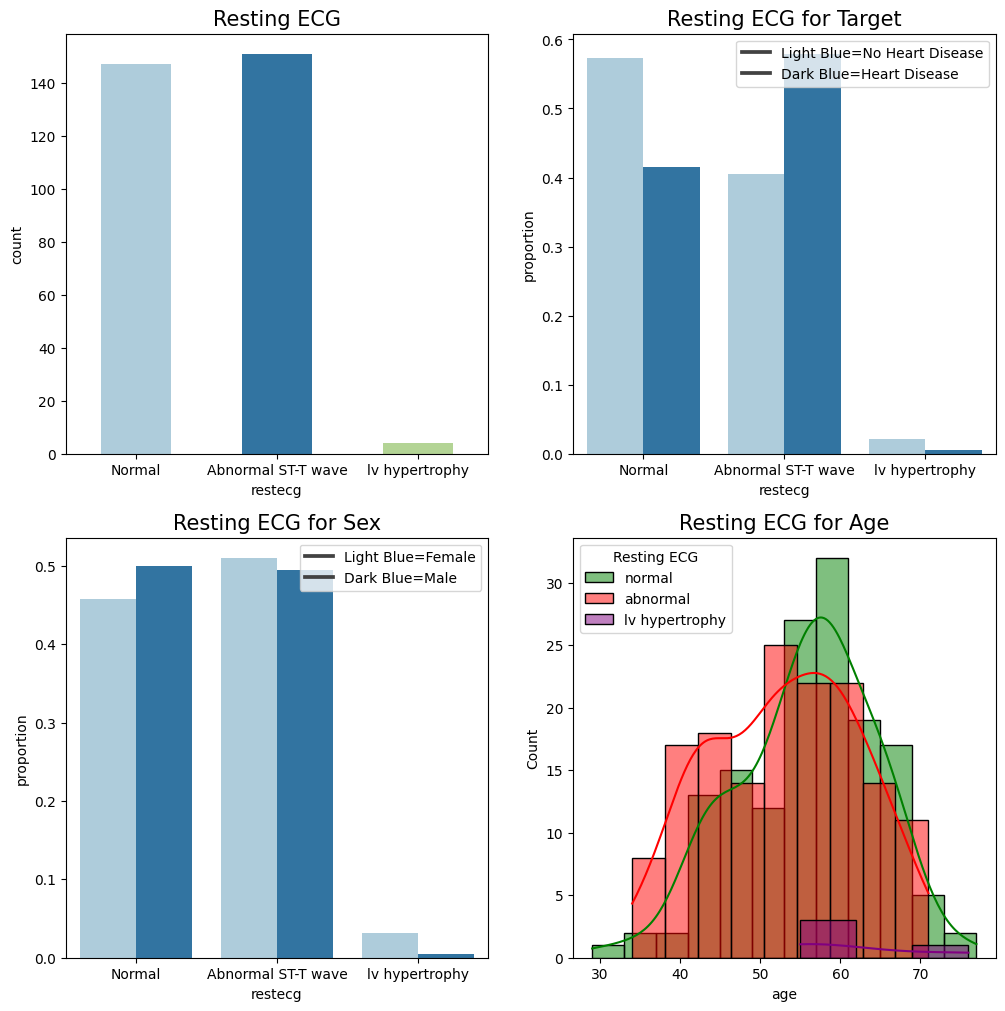

<Figure size 640x480 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(12, 12))

# Resting ECG 
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='restecg',palette='Paired', width=0.5)
plt.xticks([0,1,2],['Normal','Abnormal ST-T wave','lv hypertrophy'])
plt.title('Resting ECG', fontsize=15)

# Resting ECG by Target
plt.subplot(2, 2, 2)
data['restecg'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='restecg', y='proportion', hue='target', palette='Paired')
plt.legend(labels=['Light Blue=No Heart Disease','Dark Blue=Heart Disease'])
plt.xticks([0,1,2],['Normal','Abnormal ST-T wave','lv hypertrophy'])
plt.title('Resting ECG for Target', fontsize=15)

# Resting ECG  by Sex
plt.subplot(2, 2, 3)
data['restecg'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='restecg', y='proportion', hue='sex', palette='Paired')
plt.legend(labels=['Light Blue=Female','Dark Blue=Male'])
plt.xticks([0,1,2],['Normal','Abnormal ST-T wave','lv hypertrophy'])
plt.title('Resting ECG for Sex', fontsize=15)


# Fasting blood sugar by Age
plt.subplot(2, 2, 4)
normal = data[data['restecg']==0]['age']
abnormal = data[data['restecg']==1]['age']
lv = data[data['restecg']==2]['age']
sns.histplot(normal,kde = True, color='Green', label='normal')
sns.histplot(abnormal,kde = True, color='Red', label='abnormal')
sns.histplot(lv,kde = True, color='purple', label='lv hypertrophy')
plt.title('Resting ECG for Age', fontsize=15)
plt.legend(title='Resting ECG', fontsize=10)
plt.show()

plt.tight_layout()
plt.show()

5.9 Feature Variable: Max Heart Rate (bpm)

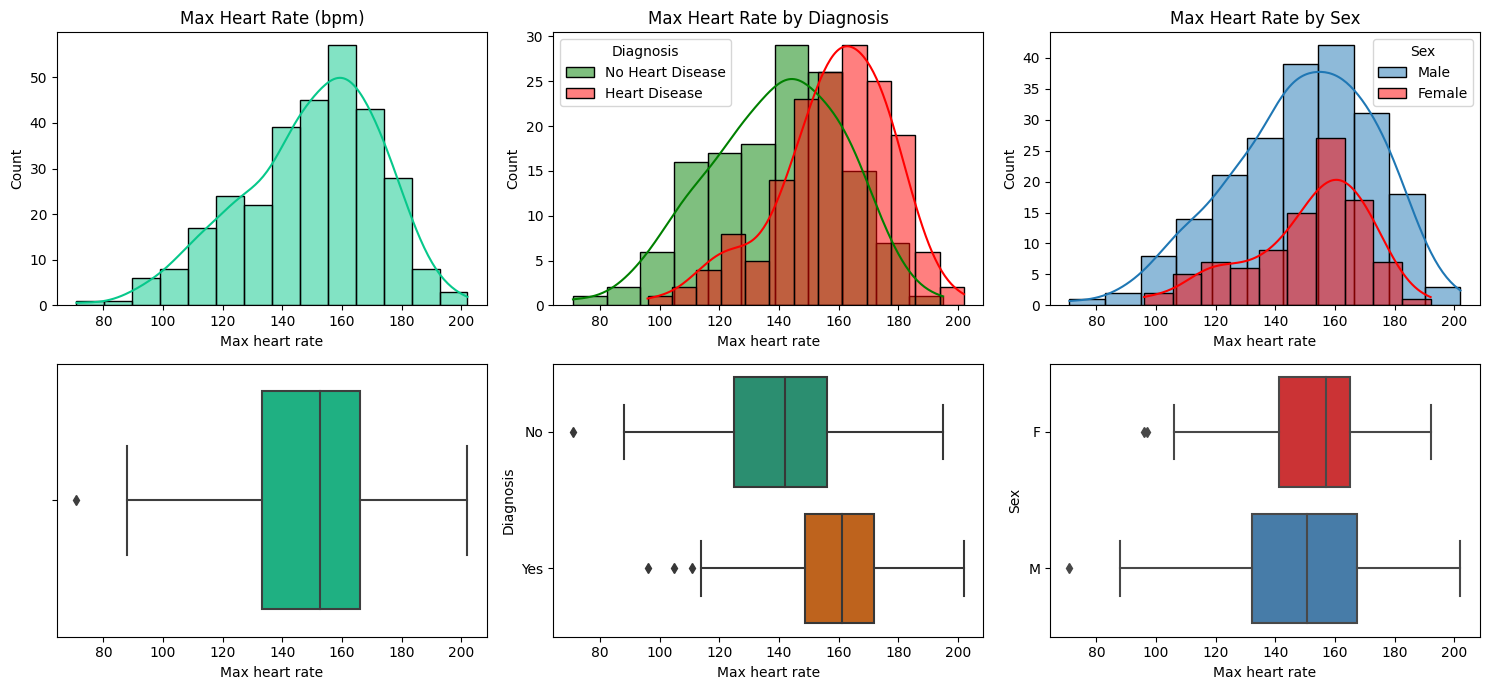

In [36]:
fig = plt.figure(figsize=(15, 7))

# Max Heart Rate (bpm) distribution
plt.subplot(2, 3, 1)
sns.histplot(data['thalach'], kde = True, color='#07C88B') 
plt.title('Max Heart Rate (bpm)', fontsize=12)
plt.xlabel('Max heart rate')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['thalach'], orient='h', color='#07C88B')
plt.xlabel('Max heart rate')  
plt.xlabel('Max heart rate')  


# Max Heart Rate (bpm) by target
plt.subplot(2, 3, 2)
benign = data[data['target']==0]['thalach']
malignant = data[data['target']==1]['thalach']
sns.histplot(benign,kde = True, color='Green', label='No Heart Disease')
sns.histplot(malignant,kde = True, color='Red', label='Heart Disease')
plt.title('Max Heart Rate by Diagnosis', fontsize=12)
plt.xlabel('Max heart rate')
plt.legend(title='Diagnosis', fontsize=10)

    
plt.subplot(2, 3, 5)
sns.boxplot(x=data['thalach'], y=data['target'], orient='h', palette='Dark2')
plt.xlabel('Max heart rate')
plt.ylabel('Diagnosis')
plt.yticks([0,1],['No','Yes'])


# Max Heart Rate (bpm) for sex
plt.subplot(2, 3, 3)
female = data[data['sex']==0]['thalach']
male = data[data['sex']==1]['thalach']
sns.histplot(male, kde = True, label='Male')
sns.histplot(female, kde = True, color='Red', label='Female')
plt.title('Max Heart Rate by Sex', fontsize=12)
plt.xlabel('Max heart rate')
plt.legend(title='Sex', fontsize=10)

plt.subplot(2, 3, 6)
sns.boxplot(x=data['thalach'], y=data['sex'], orient='h', palette='Set1')
plt.xlabel('Max heart rate')
plt.ylabel('Sex')
plt.yticks([0,1],['F','M'])
    
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

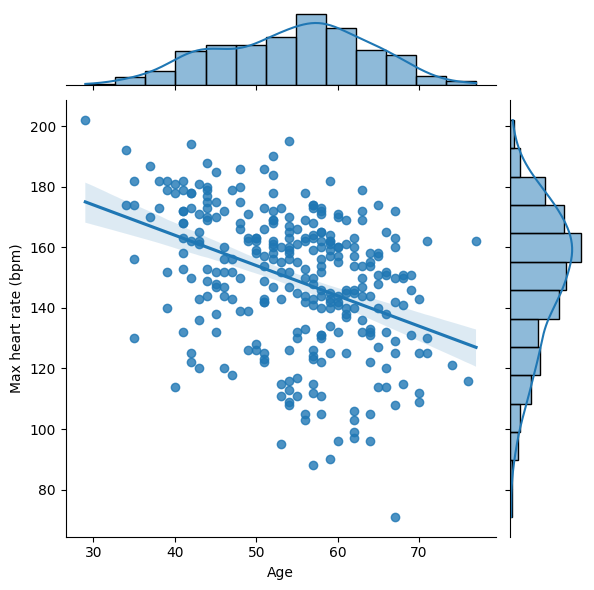

In [37]:
fig = plt.figure(figsize=(5, 5))
sns.jointplot(x = 'age' , y = 'thalach', data = data, kind = 'reg')
plt.ylabel('Max heart rate (bpm)')
plt.xlabel('Age')
plt.show()

5.10 Feature Variable: Exercise induced angina
0 = False
1 = True

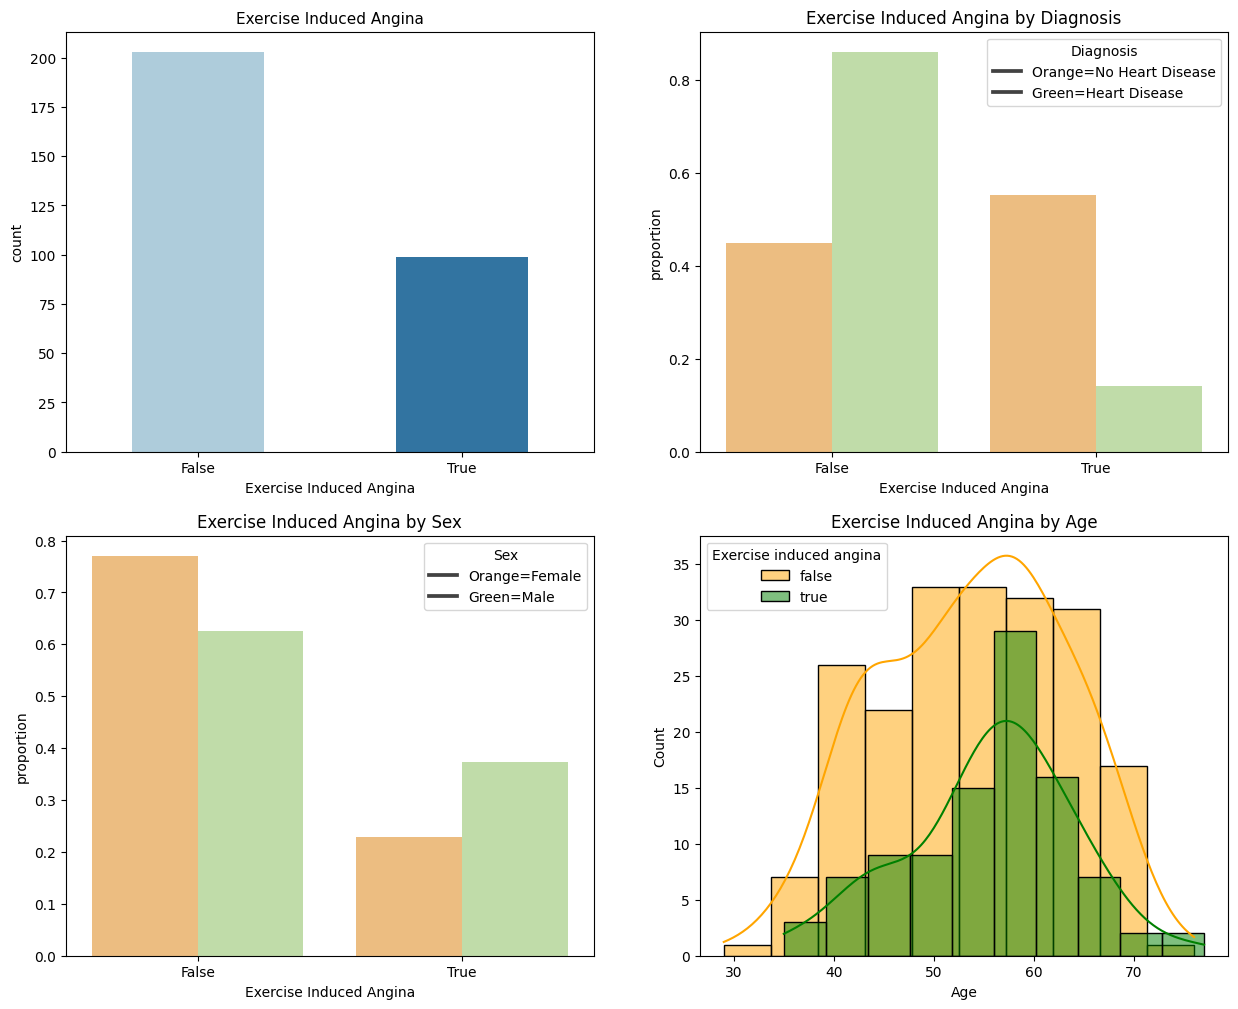

<Figure size 640x480 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(15, 12))

# Exercise induced angina
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='exang',palette='Paired', width=0.5)
plt.xticks([0,1],['False','True'])
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina', fontsize=11)


# Exercise induced angina  by Chest Pain
# plt.subplot(2, 3, 2)
# # sns.countplot(data=data, x='exang',hue='cp',palette='Paired', width=0.5)
# data['exang'].groupby(data['cp']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='exang', y='proportion', hue='cp', palette='Spectral')
# plt.xticks([0,1],['False','True'])
# plt.xlabel('Exercise Induced Angina')
# plt.title('Exercise Induced Angina by Chest Pain Type', fontsize=11)

# Exercise induced angina by Target
plt.subplot(2, 2, 2)
data['exang'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='exang', y='proportion', hue='target', palette='Spectral')
plt.legend(title='Diagnosis', labels=['Orange=No Heart Disease','Green=Heart Disease'])
plt.xticks([0,1],['False','True'])
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina by Diagnosis', fontsize=12)

# Exercise induced angina by sex
plt.subplot(2, 2, 3)
data['exang'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='exang', y='proportion', hue='sex', palette='Spectral')
plt.legend(title='Sex',labels=['Orange=Female','Green=Male'])
plt.xticks([0,1],['False','True'])
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina by Sex', fontsize=12)

# Exercise induced angina by age
plt.subplot(2, 2, 4)
false = data[data['exang']==0]['age']
true = data[data['exang']==1]['age']
sns.histplot(false,kde = True, color='orange', label='false')
sns.histplot(true,kde = True, color='green', label='true')
plt.title('Exercise Induced Angina by Age', fontsize=12)
plt.legend(title='Exercise induced angina', fontsize=10)
plt.xlabel('Age')
plt.show()

plt.tight_layout()
plt.show()

5.11 Feature Variable: ST depression induced by exercise relative to rest

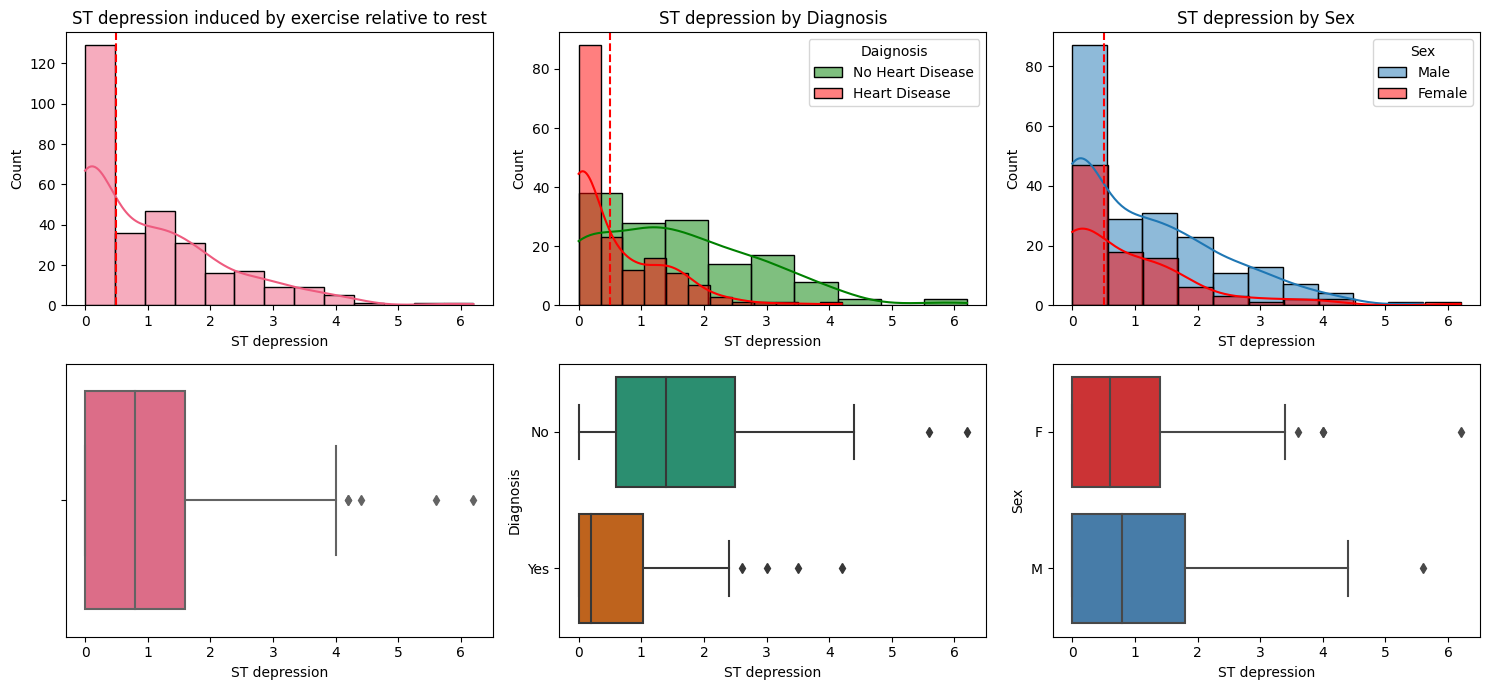

In [39]:
fig = plt.figure(figsize=(15, 7))

# ST depression distribution
plt.subplot(2, 3, 1)
sns.histplot(x=data['oldpeak'], kde = True, color='#EE5B7F') 
plt.title('ST depression induced by exercise relative to rest', fontsize=12)
plt.xlabel('ST depression')
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
 
plt.subplot(2, 3, 4)
sns.boxplot(x=data['oldpeak'], orient='h', color='#EE5B7F')
plt.xlabel('ST depression')
    
# ST depression by target
plt.subplot(2, 3, 2)
benign = data[data['target']==0]['oldpeak']
malignant = data[data['target']==1]['oldpeak']
sns.histplot(benign,kde = True, color='Green', label='No Heart Disease')
sns.histplot(malignant,kde = True, color='Red', label='Heart Disease')
plt.title('ST depression by Diagnosis', fontsize=12)
plt.legend(title='Daignosis', fontsize=10)
plt.xlabel('ST depression')
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
plt.subplot(2, 3, 5)
sns.boxplot(x=data['oldpeak'], y=data['target'], orient='h', palette='Dark2')
plt.xlabel('ST depression')
plt.ylabel('Diagnosis')
plt.yticks([0,1],['No','Yes'])

# ST depression for sex
plt.subplot(2, 3, 3)
female = data[data['sex']==0]['oldpeak']
male = data[data['sex']==1]['oldpeak']
sns.histplot(male, kde = True, label='Male')
sns.histplot(female, kde = True, color='Red', label='Female')
plt.title('ST depression by Sex', fontsize=12)
plt.xlabel('ST depression')
plt.legend(title='Sex', fontsize=10)
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
 
plt.subplot(2, 3, 6)
sns.boxplot(x=data['oldpeak'], y=data['sex'], orient='h', palette='Set1')
plt.xlabel('ST depression')
plt.ylabel('Sex')
plt.yticks([0,1],['F','M'])
    
    
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

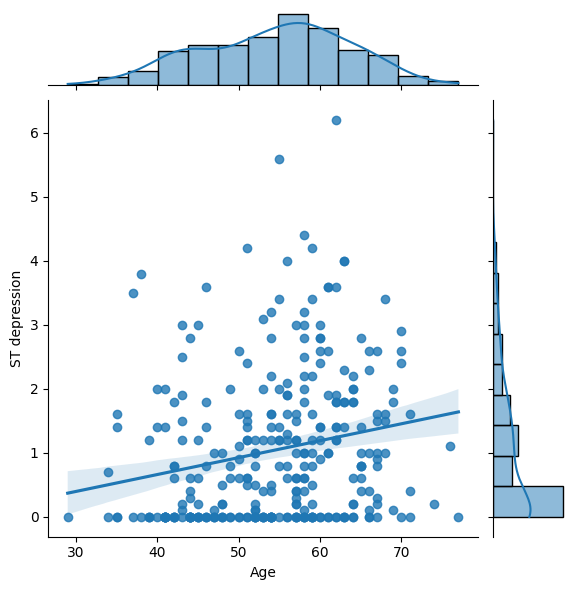

In [40]:
fig = plt.figure(figsize=(5, 5))
sns.jointplot(x = 'age' , y = 'oldpeak', data = data, kind = 'reg')
plt.ylabel('ST depression')
plt.xlabel('Age')
plt.show()

5.12 Feature Variable: The slope of the peak exercise ST segment
0 = Upsloping
1 = Horizontal
2 = Downsloping

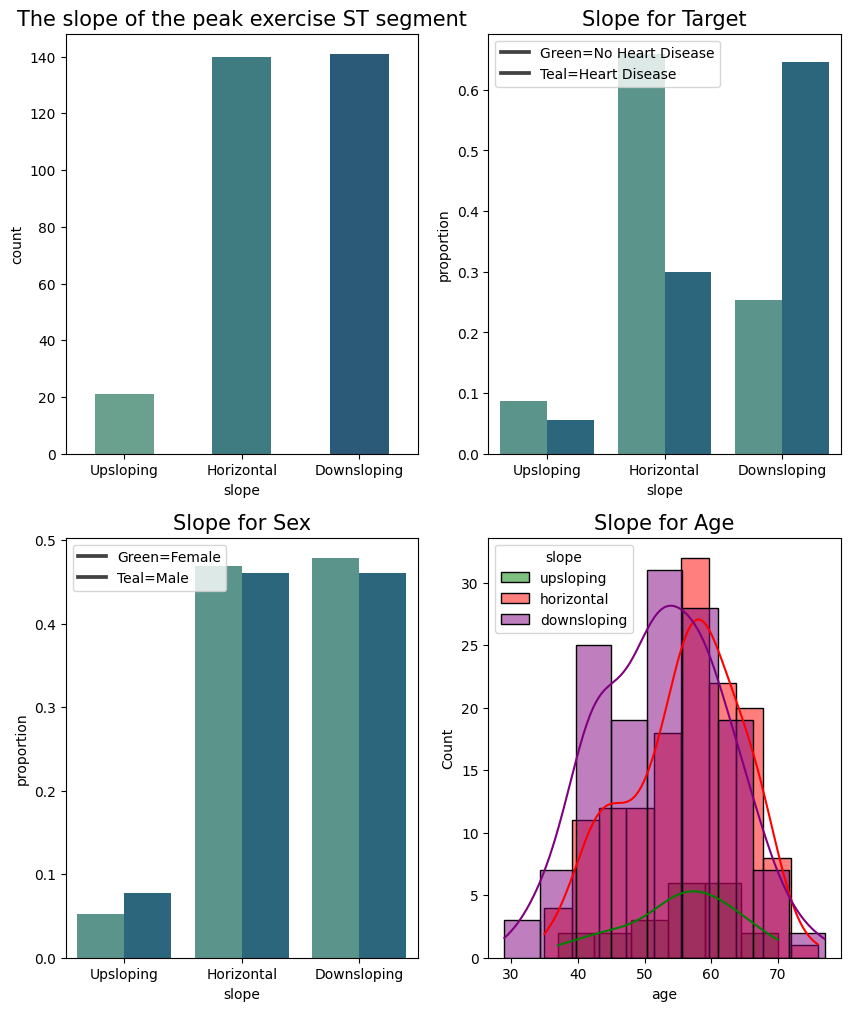

<Figure size 640x480 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(10, 12))

# The slope of the peak exercise ST segment
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='slope',palette='crest', width=0.5)
plt.xticks([0,1,2],['Upsloping','Horizontal','Downsloping'])
plt.title('The slope of the peak exercise ST segment', fontsize=15)

# slope of the peak exercise ST segment by Target
plt.subplot(2, 2, 2)
data['slope'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='slope', y='proportion', hue='target', palette='crest')
plt.legend(labels=['Green=No Heart Disease','Teal=Heart Disease'])
plt.xticks([0,1,2],['Upsloping','Horizontal','Downsloping'])
plt.title('Slope for Target', fontsize=15)

# slope of the peak exercise ST segment by Sex
plt.subplot(2, 2, 3)
data['slope'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='slope', y='proportion', hue='sex', palette='crest')
plt.legend(labels=['Green=Female','Teal=Male'])
plt.xticks([0,1,2],['Upsloping','Horizontal','Downsloping'])
plt.title('Slope for Sex', fontsize=15)

# slope of the peak exercise ST segment by Age
plt.subplot(2, 2, 4)
upsloping = data[data['slope']==0]['age']
horizontal = data[data['slope']==1]['age']
downsloping = data[data['slope']==2]['age']
sns.histplot(upsloping,kde = True, color='Green', label='upsloping')
sns.histplot(horizontal,kde = True, color='Red', label='horizontal')
sns.histplot(downsloping, kde = True, color='purple', label='downsloping')
plt.title('Slope for Age', fontsize=15)
plt.legend(title='slope', fontsize=10)
plt.show()

plt.tight_layout()
plt.show()

5.13 Feature Variable: Number of major vessels (0-3) colored by flourosopy

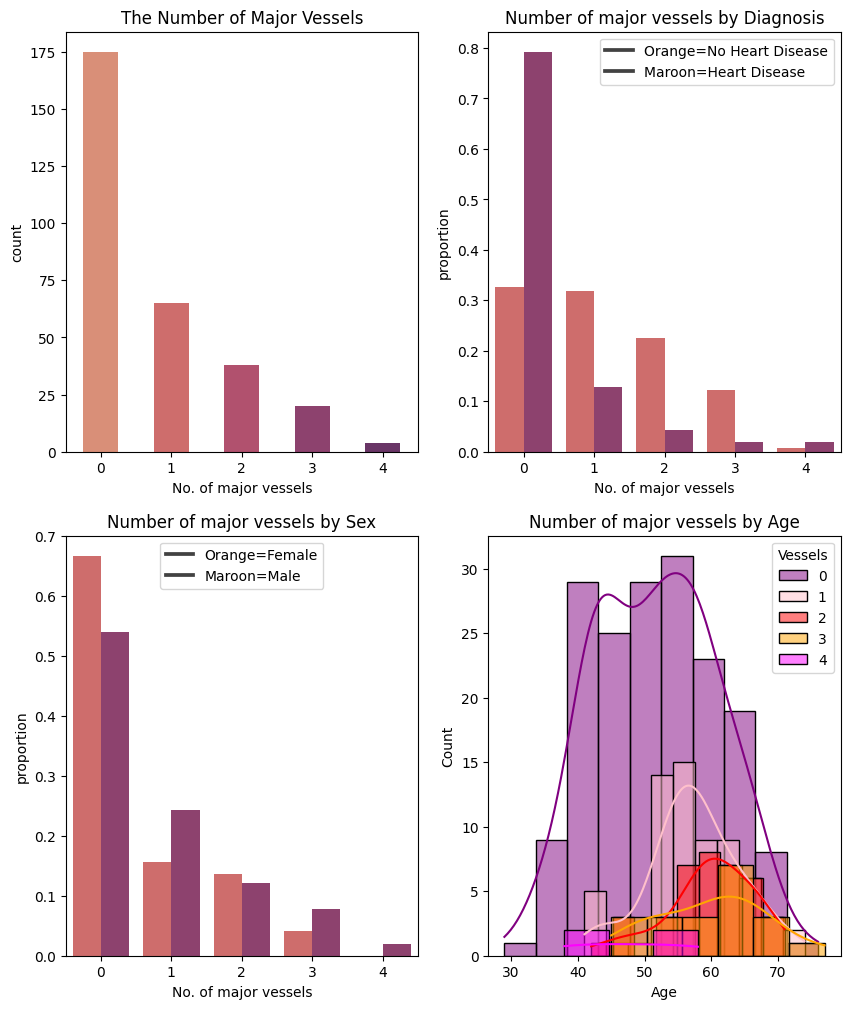

<Figure size 640x480 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(10, 12))

# number of major vessels (0-3) colored by flourosopy
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='ca',palette='flare', width=0.5)
plt.title('The Number of Major Vessels', fontsize=12)
plt.xlabel('No. of major vessels')

# number of major vessels by Target
plt.subplot(2, 2, 2)
data['ca'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ca', y='proportion', hue='target', palette='flare')
plt.legend(labels=['Orange=No Heart Disease','Maroon=Heart Disease'])
plt.title('Number of major vessels by Diagnosis', fontsize=12)
plt.xlabel('No. of major vessels')

# number of major vessels by Sex
plt.subplot(2, 2, 3)
data['ca'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ca', y='proportion', hue='sex', palette='flare')
plt.legend(labels=['Orange=Female','Maroon=Male'])
plt.title('Number of major vessels by Sex', fontsize=12)
plt.xlabel('No. of major vessels')

# number of major vessels by Age
plt.subplot(2, 2, 4)
zero = data[data['ca']==0]['age']
one = data[data['ca']==1]['age']
two = data[data['ca']==2]['age']
three = data[data['ca']==3]['age']
four = data[data['ca']==4]['age']
sns.histplot(zero,kde = True, color='purple', label='0')
sns.histplot(one,kde = True, color='pink', label='1')
sns.histplot(two,kde = True, color='red', label='2')
sns.histplot(three,kde = True, color='orange', label='3')
sns.histplot(four,kde = True, color='magenta', label='4')
plt.title('Number of major vessels by Age', fontsize=12)
plt.xlabel('Age')
plt.legend(title='Vessels', fontsize=10)
plt.show()


plt.tight_layout()
plt.show()

5.14: Feature Variable: Thallium scintigraphy
1 = Normal
2 = Fixed defect
3 = Reversable defect

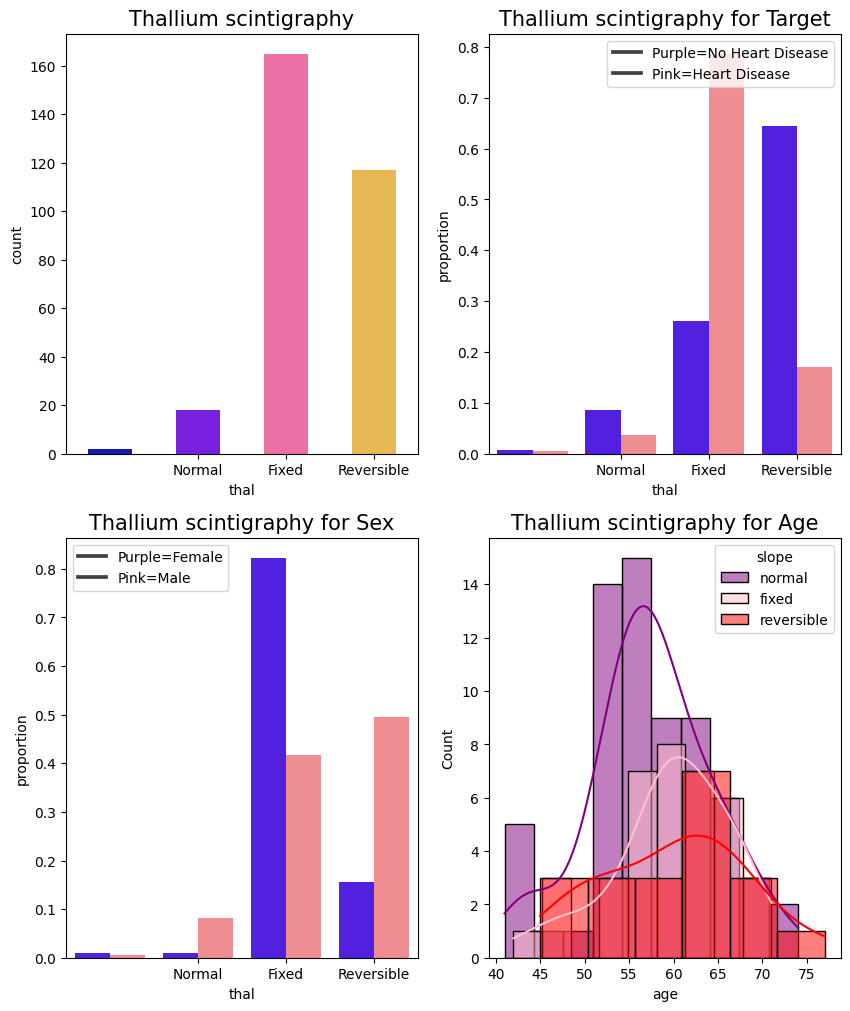

<Figure size 640x480 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(10, 12))

# Thallium scintigraphy
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='thal',palette='gnuplot2', width=0.5)
plt.xticks([1,2,3],['Normal','Fixed','Reversible'])
plt.title('Thallium scintigraphy', fontsize=15)

# FThallium scintigraphy by Target
plt.subplot(2, 2, 2)
data['thal'].groupby(data['target']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='thal', y='proportion', hue='target', palette='gnuplot2')
plt.legend(labels=['Purple=No Heart Disease','Pink=Heart Disease'])
plt.xticks([1,2,3],['Normal','Fixed','Reversible'])
plt.title('Thallium scintigraphy for Target', fontsize=15)

# Thallium scintigraphy by Sex
plt.subplot(2, 2, 3)
data['thal'].groupby(data['sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='thal', y='proportion', hue='sex', palette='gnuplot2')
plt.legend(labels=['Purple=Female','Pink=Male'])
plt.xticks([1,2,3],['Normal','Fixed','Reversible'])
plt.title('Thallium scintigraphy for Sex', fontsize=15)


# Thallium scintigraphy by Age
plt.subplot(2, 2, 4)
normal = data[data['ca']==1]['age']
fixed = data[data['ca']==2]['age']
reversible = data[data['ca']==3]['age']
sns.histplot(normal,kde = True, color='purple', label='normal')
sns.histplot(fixed,kde = True, color='pink', label='fixed')
sns.histplot(reversible,kde = True, color='red', label='reversible')
plt.title('Thallium scintigraphy for Age', fontsize=15)
plt.legend(title='slope', fontsize=10)
plt.show()

plt.tight_layout()
plt.show()

5.15 Correlation

In [44]:
categorical_val=[]
continuous_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [45]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [46]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

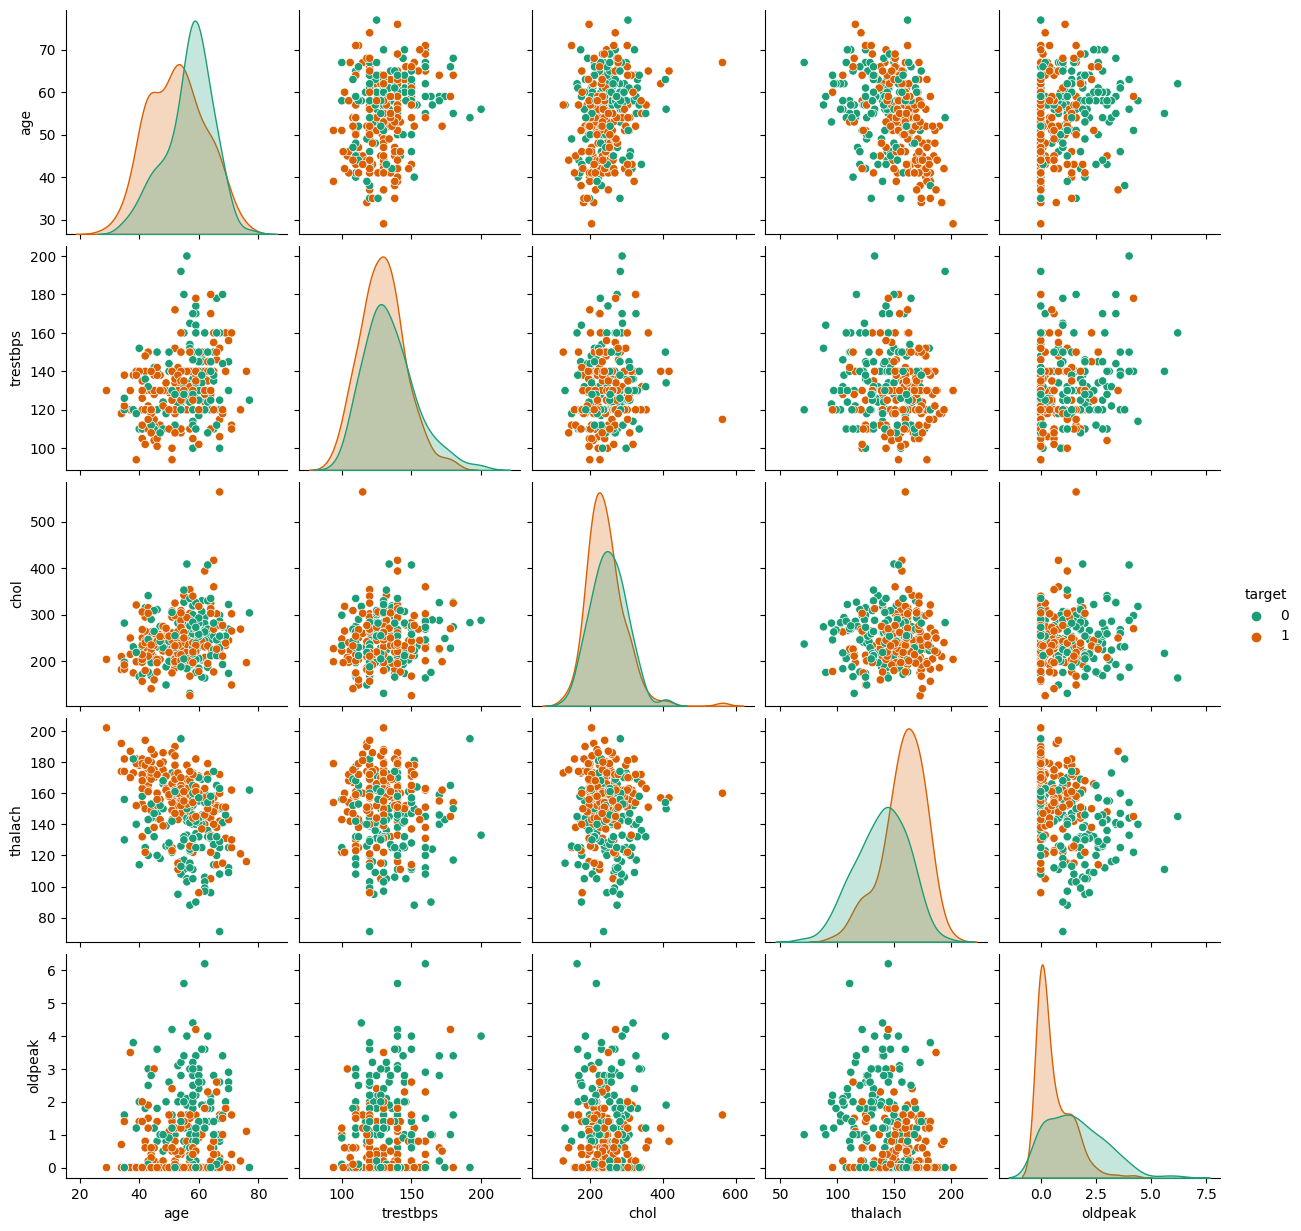

In [47]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']],hue='target', palette='Dark2')

<Axes: >

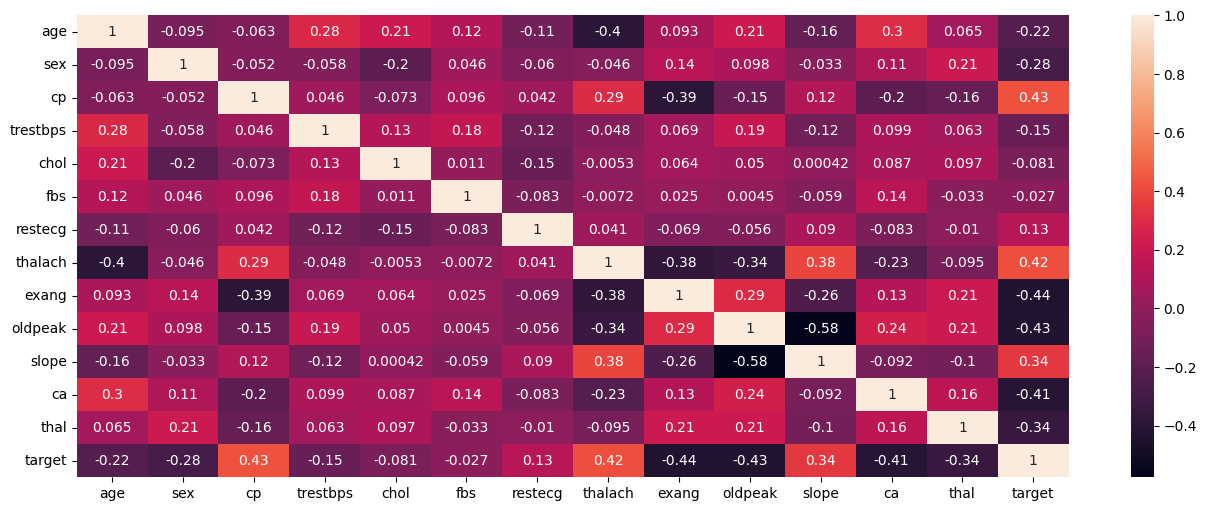

In [48]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)

It is seen that cp-Chest Pain Type (0.43), thalach-max heart rate (0.42) has the highest positive correlation with the target feature while exang-Exercise induced angina (-0.44), oldpeak-ST-depression (-0.43) and ca-Number of blood vessels colored (-0.41) have the highest negative correlation with the target feature.

<Axes: title={'center': 'Correlation of Feautures with Target'}, ylabel='target'>

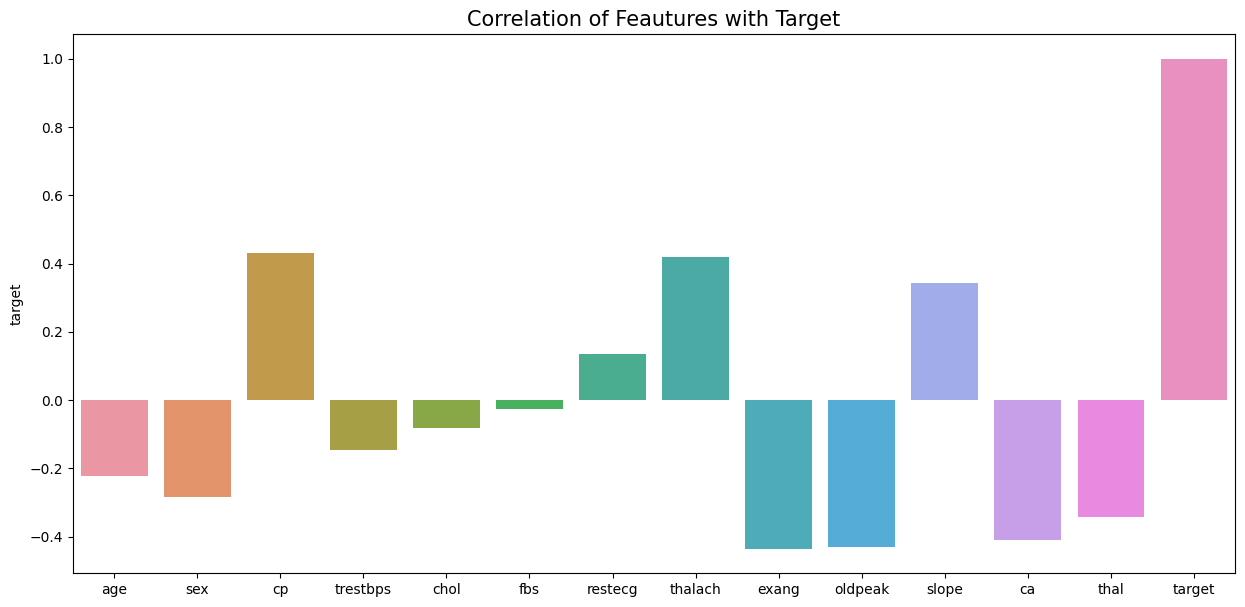

In [49]:
corr_matrix=data.corr()

fig = plt.figure(figsize=(15, 7))
plt.title('Correlation of Feautures with Target', fontsize=15)
sns.barplot(x=corr_matrix.columns, y=corr_matrix['target'])

The following have the maximum correlation with the target feature in determining the possibility of heart disease.
cp-Chest Pain Type 
thalach-max heart rate 
exang-Exercise induced angina,
oldpeak-ST-depression 
ca-Number of blood vessels colored
